In [1]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

from random import sample
from subprocess import check_output

In [2]:
infileAveWageDept = 'City_of_Seattle_Wages__Comparison_by_Gender_-_Average_Hourly_Wage_by_Department-1.csv'
#infileWageJobTitles = 'City_of_Seattle_Wages___Comparison_by_Gender__Wage_Progression_Job_Titles-1.csv'

In [3]:
dfAveWageDept = pd.read_csv(infileAveWageDept)
dfAveWageDept.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [4]:
deptDF = dfAveWageDept.groupby(
   ['Department']
    ).agg(
        {
             'Total No. Empl':sum,    # Sum duration per group
             'No. Male Empl':sum,  # get the count of females
             'No. Female Empl':sum,  # get the count of males

        }
    )
deptDF

,Total No. Empl,No. Male Empl,No. Female Empl
Department,,,
Arts and Cultural Affairs,28,8.0,20.0
City Auditor,10,2.0,8.0
City Budget Office,27,10.0,17.0
City Employees Retirement Syst,16,4.0,12.0
City Light,1689,1169.0,520.0
Civil Service Commissions,8,5.0,3.0
Department of Planning & Dev,326,177.0,149.0
Dept of Finance & Admn Svc,501,272.0,229.0
Ethics And Elections,7,4.0,3.0


In [ ]:
depts = 
femEmps = 
malEmps = 

<BarContainer object of 31 artists>

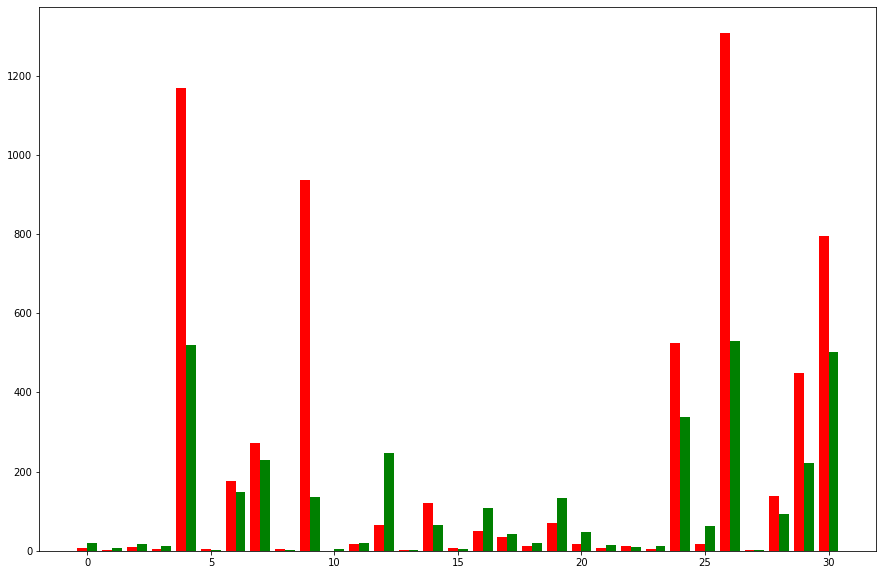

In [59]:
#What is the male to female ratio of each deptartment? - pie charts
#create list of colors
colors = []
#Get Unique Departments
labels = dfAveWageDept["Department"].unique()
#remove last entry from Labels "Nan"
labels = np.delete(labels, len(labels) - 1)
xVals = np.arange(len(labels))
fig,ax = plt.subplots(figsize=(15,10))
# plot pie chart
plt.bar(xVals - 0.2, deptDF['No. Male Empl'], width=0.4, color='red')
plt.bar(xVals + 0.2, deptDF['No. Female Empl'], width=0.4, color='green')


In [8]:
#What is the female to male % average hourly rate by department? (variance in wage) - scatterplot
dfAveWageDept.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [8]:
deptRateDF = dfAveWageDept.groupby(
   ['Department']
    ).agg(
        {
             'Total Avg Hrly Rate': "mean",    # Sum duration per group
             'Male Avg Hrly Rate': "mean",  # get the count of females
             'Female Avg Hrly Rate': "mean",  # get the count of males

        }
    )
deptRateDF

,Total Avg Hrly Rate,Male Avg Hrly Rate,Female Avg Hrly Rate
Department,,,
Arts and Cultural Affairs,34.830000,31.623750,36.366923
City Auditor,49.200000,56.390000,41.475000
City Budget Office,47.695714,55.170000,44.316667
City Employees Retirement Syst,39.465000,35.080000,37.761250
City Light,39.214015,40.674619,38.136923
Civil Service Commissions,29.646667,5.530000,29.646667
Department of Planning & Dev,40.883294,42.604655,40.298947
Dept of Finance & Admn Svc,36.920388,37.185647,36.281250
Ethics And Elections,46.467500,47.122500,44.870000
